
# 2 Explanation of different measures

[Picture would be nice]

**Example 2.1.** Consider three countries, each with 100,000 people and an area of $100km^2$, and think about the population of each square kilometre grid square.

1.  *Averagia*  has  a  uniform  spread  of  population,  with  1,000  people  living  in  each  gridsquare.
2.  *Builtupia*  has  ten  towns,  each  of  10,000  people  living  in  a  single  square  kilometre, and the remaining land is uninhabited.
3.  *Citia* has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.


Heatmap on a 10x10 grid?


Perfect situation to use a dot density map
Dot distribution map
A dot distribution map, or dot density map, is a map type that uses a dot symbol to show the presence of a feature or a phenomenon. Dot maps rely on a visual scatter to show spatial pattern.


Yes, and randomize+jitter dot placement within the defined cells of the grid.


Not sure the name of it, I see it specific to world maps, population numbers, the idea is a 3D column off of the map area, get an idea of population per x, compared to the surrounding x’s.


Same thing here, map out your distro’s, place a column going up based on pop numbers vs surrounding green space.


Choropleth map with a color scale mapped linearly to population.


Would be all the same light color cells in the grid
Would have 10 moderate color cells and very light remaining cells
would have 1 very dark cell and very light remaining cells
You could imagine hovering over each part of the map and seeing the population estimate for that subset of the countries

In [1]:

import numpy as np

total_pop = 100_000

# Averagia has a uniform spread of population, with 1,000 people living in each gridsquare.
averagia_people_count = 1_000
averagia_town_count = total_pop / averagia_people_count

# Builtupia has ten towns, each of 10,000 people living in a single square kilometre, and the remaining land is uninhabited.
builtupia_people_count = 10_000
builtupia_town_count = total_pop / builtupia_people_count

# Citia has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.
citia_people_count = 100_000
citia_town_count = total_pop / citia_people_count

gridsquare_count = total_pop / averagia_people_count
side_length = int(np.sqrt(gridsquare_count))

In [2]:

# Uniform inputs to bar chart
xx, yy = np.meshgrid(np.arange(10), np.arange(10))
x, y = xx.ravel(), yy.ravel()

width = depth = 1

In [3]:

%run ../../load_magic/storage.py
s = Storage()
averagia_data = np.rot90(np.fliplr(s.load_object('averagia_data')), k=1)
averagia_top = np.array(averagia_data.flat)
bottom = np.zeros_like(np.array(averagia_data.flat))
builtupia_data = np.rot90(np.fliplr(s.load_object('builtupia_data')), k=1)
builtupia_top = np.array(builtupia_data.flat)
citia_data = np.rot90(np.fliplr(s.load_object('citia_data')), k=1)
citia_top = np.array(citia_data.flat)

In [4]:

def save_fig_as_various(fig, chart_name):
    for dir_name in ['pgf', 'png', 'svg']:
        dir_path = os.path.join(s.saves_folder, dir_name)
        os.makedirs(name=dir_path, exist_ok=True)
        file_path = os.path.join(dir_path, '{}.{}'.format(chart_name, dir_name))
        fig.savefig(file_path)

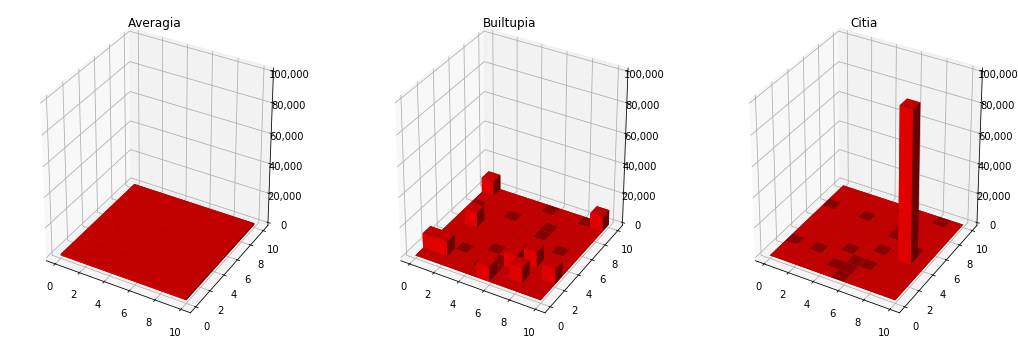

In [37]:

%matplotlib inline
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from mpl_toolkits import mplot3d
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LogNorm
import copy
import matplotlib as mpl

# Setup the figure and axes
fig = plt.figure(figsize=(18, 18/3))
cmap = copy.copy(mpl.cm.get_cmap('Reds'))
cmap.set_bad(cmap(1)[:-1])
norm = LogNorm(vmin=1, vmax=total_pop, clip=False)
#suptitle_str = '$Example 2.1.$ Consider three countries, each with 100,000 people and an area of $100km^2$,\n'
#suptitle_str += 'and think about the population of each square kilometre grid square.'
#fig.suptitle(suptitle_str)

ax_averagia = fig.add_subplot(131, projection='3d')
ax_builtupia = fig.add_subplot(132, projection='3d')
ax_citia = fig.add_subplot(133, projection='3d')

Poly3DCollection_obj = ax_averagia.bar3d(x, y, bottom, width, depth, averagia_top, shade=True, cmap=cmap, norm=norm, color='r')
Text_tuple = ax_averagia.set_title('Averagia')
zlim_tuple = ax_averagia.set_zlim(0, total_pop)
ax_averagia.zaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

Poly3DCollection_obj = ax_builtupia.bar3d(x, y, bottom, width, depth, builtupia_top, shade=True, cmap=cmap, norm=norm, color='r')
Text_tuple = ax_builtupia.set_title('Builtupia')
zlim_tuple = ax_builtupia.set_zlim(0, total_pop)
ax_builtupia.zaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

Poly3DCollection_obj = ax_citia.bar3d(x, y, bottom, width, depth, citia_top, shade=True, cmap=cmap, norm=norm, color='r')
Text_tuple = ax_citia.set_title('Citia')
zlim_tuple = ax_citia.set_zlim(0, total_pop)
ax_citia.zaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

save_fig_as_various(fig, 'example_2_1_3d_bar_chart')


----

In [10]:

print(['Poly3DCollection_obj.{}'.format(fn) for fn in dir(Poly3DCollection_obj) if 'color' in fn.lower()])

['Poly3DCollection_obj._edgecolors', 'Poly3DCollection_obj._edgecolors2d', 'Poly3DCollection_obj._edgecolors3d', 'Poly3DCollection_obj._facecolors', 'Poly3DCollection_obj._facecolors2d', 'Poly3DCollection_obj._facecolors3d', 'Poly3DCollection_obj._hatch_color', 'Poly3DCollection_obj._original_edgecolor', 'Poly3DCollection_obj._original_facecolor', 'Poly3DCollection_obj._set_edgecolor', 'Poly3DCollection_obj._set_facecolor', 'Poly3DCollection_obj.colorbar', 'Poly3DCollection_obj.get_edgecolor', 'Poly3DCollection_obj.get_edgecolors', 'Poly3DCollection_obj.get_facecolor', 'Poly3DCollection_obj.get_facecolors', 'Poly3DCollection_obj.set_color', 'Poly3DCollection_obj.set_edgecolor', 'Poly3DCollection_obj.set_edgecolors', 'Poly3DCollection_obj.set_facecolor', 'Poly3DCollection_obj.set_facecolors']


In [33]:

import pyperclip

pyperclip.copy(str(Poly3DCollection_obj.get_facecolors()))

In [34]:

facecolors_list = Poly3DCollection_obj.get_facecolors()
print(type(facecolors_list))

<class 'list'>


In [24]:

Poly3DCollection_obj.get_facecolor()[:6]

[array([0.65, 0.  , 0.  , 1.  ]),
 array([0.65, 0.  , 0.  , 1.  ]),
 array([0.53333345, 0.        , 0.        , 1.        ]),
 array([0.76666655, 0.        , 0.        , 1.        ]),
 array([0.65, 0.  , 0.  , 1.  ]),
 array([0.65, 0.  , 0.  , 1.  ])]

In [18]:

Poly3DCollection_obj._facecolors3d[:6]

array([[0.53333345, 0.        , 0.        , 1.        ],
       [0.76666655, 0.        , 0.        , 1.        ],
       [0.65      , 0.        , 0.        , 1.        ],
       [0.65      , 0.        , 0.        , 1.        ],
       [0.65      , 0.        , 0.        , 1.        ],
       [0.65      , 0.        , 0.        , 1.        ]])

In [ ]:

# shape (6, 4, 3)
# All faces are oriented facing outwards - when viewed from the
# outside, their vertices are in a counterclockwise ordering.
cuboid = np.array([
# color : sequence of valid color specifications, optional
    # The color of the bars can be specified globally or
    # individually. This parameter can be:

      # - A single color value, to color all bars the same color.
      # - An array of colors of length N bars, to color each bar
        # independently.
      # - An array of colors of length 6, to color the faces of the
        # bars similarly.
      # - An array of colors of length 6 * N bars, to color each face
        # independently.

    # When coloring the faces of the boxes specifically, this is
    # the order of the coloring:

      # 1. -Z (bottom of box)
    # -z
    (
        (0, 0, 0),
        (0, 1, 0),
        (1, 1, 0),
        (1, 0, 0),
    ),
      # 2. +Z (top of box)
    # +z
    (
        (0, 0, 1),
        (1, 0, 1),
        (1, 1, 1),
        (0, 1, 1),
    ),
      # 3. -Y
    # -y
    (
        (0, 0, 0),
        (1, 0, 0),
        (1, 0, 1),
        (0, 0, 1),
    ),
      # 4. +Y
    # +y
    (
        (0, 1, 0),
        (0, 1, 1),
        (1, 1, 1),
        (1, 1, 0),
    ),
      # 5. -X
    # -x
    (
        (0, 0, 0),
        (0, 0, 1),
        (0, 1, 1),
        (0, 1, 0),
    ),
      # 6. +X
    # +x
    (
        (1, 0, 0),
        (1, 1, 0),
        (1, 1, 1),
        (1, 0, 1),
    ),
])

In [8]:

print(['ax_citia.{}'.format(fn) for fn in dir(ax_citia) if not fn.startswith('_')])

['ax_citia.M', 'ax_citia.acorr', 'ax_citia.add_artist', 'ax_citia.add_callback', 'ax_citia.add_child_axes', 'ax_citia.add_collection', 'ax_citia.add_collection3d', 'ax_citia.add_container', 'ax_citia.add_contour_set', 'ax_citia.add_contourf_set', 'ax_citia.add_image', 'ax_citia.add_line', 'ax_citia.add_patch', 'ax_citia.add_table', 'ax_citia.aname', 'ax_citia.angle_spectrum', 'ax_citia.annotate', 'ax_citia.apply_aspect', 'ax_citia.arrow', 'ax_citia.artists', 'ax_citia.auto_scale_xyz', 'ax_citia.autoscale', 'ax_citia.autoscale_view', 'ax_citia.axes', 'ax_citia.axhline', 'ax_citia.axhspan', 'ax_citia.axis', 'ax_citia.axison', 'ax_citia.axvline', 'ax_citia.axvspan', 'ax_citia.azim', 'ax_citia.bar', 'ax_citia.bar3d', 'ax_citia.barbs', 'ax_citia.barh', 'ax_citia.bbox', 'ax_citia.boxplot', 'ax_citia.broken_barh', 'ax_citia.button_pressed', 'ax_citia.bxp', 'ax_citia.callbacks', 'ax_citia.can_pan', 'ax_citia.can_zoom', 'ax_citia.change_geometry', 'ax_citia.child_axes', 'ax_citia.cla', 'ax_citi